## P5 Analysis - Un notebook d’essais

In [33]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [34]:
segmentation=pd.read_csv('/Users/riina//Downloads/rrvaluesdf.csv')

In [35]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_unique_id  118315 non-null  object 
 1   delay               115727 non-null  float64
 2   bought              118315 non-null  object 
 3   money               118315 non-null  float64
 4   days                118315 non-null  int64  
 5   times               118315 non-null  int64  
 6   monetary            118315 non-null  int64  
 7   recency             118315 non-null  int64  
 8   frequency           118315 non-null  int64  
 9   summa               118315 non-null  int64  
 10  payment             118315 non-null  object 
 11  state               118315 non-null  object 
 12  ncategories         118315 non-null  int64  
 13  pcategory           116759 non-null  object 
 14  review_score        118315 non-null  float64
dtypes: float64(3), int64(7), object(5)

In [36]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_unique_id  118315 non-null  object 
 1   delay               115727 non-null  float64
 2   bought              118315 non-null  object 
 3   money               118315 non-null  float64
 4   days                118315 non-null  int64  
 5   times               118315 non-null  int64  
 6   monetary            118315 non-null  int64  
 7   recency             118315 non-null  int64  
 8   frequency           118315 non-null  int64  
 9   summa               118315 non-null  int64  
 10  payment             118315 non-null  object 
 11  state               118315 non-null  object 
 12  ncategories         118315 non-null  int64  
 13  pcategory           116759 non-null  object 
 14  review_score        118315 non-null  float64
dtypes: float64(3), int64(7), object(5)

In [37]:
X=segmentation.copy()

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_unique_id  118315 non-null  object 
 1   delay               115727 non-null  float64
 2   bought              118315 non-null  object 
 3   money               118315 non-null  float64
 4   days                118315 non-null  int64  
 5   times               118315 non-null  int64  
 6   monetary            118315 non-null  int64  
 7   recency             118315 non-null  int64  
 8   frequency           118315 non-null  int64  
 9   summa               118315 non-null  int64  
 10  payment             118315 non-null  object 
 11  state               118315 non-null  object 
 12  ncategories         118315 non-null  int64  
 13  pcategory           116759 non-null  object 
 14  review_score        118315 non-null  float64
dtypes: float64(3), int64(7), object(5)

In [39]:
del X['money']
del X['days']
del X['times']
del X['summa']
del X['customer_unique_id']

In [40]:
X.drop(X[X['delay'].isna()].index, inplace=True)

In [41]:
dftest=X.copy()

In [42]:
numerical_columns = X.select_dtypes(['int64','float64']).columns

In [43]:
ss = StandardScaler()
X[numerical_columns] = ss.fit_transform(X[numerical_columns])

In [44]:
cat=X[numerical_columns]

In [45]:
cat

,delay,monetary,recency,frequency,ncategories,review_score
0,-0.637069,0.260292,1.338963,-0.57933,-0.157841,0.695116
1,-0.954443,-1.482775,1.338963,-0.57933,-0.157841,-0.047688
2,1.372969,-0.611242,-1.347979,-0.57933,-0.157841,-0.790493
3,0.844012,-1.482775,-0.452332,-0.57933,-0.157841,-0.047688
4,0.103471,0.260292,-0.452332,-0.57933,-0.157841,0.695116
...,...,...,...,...,...,...
118310,1.584552,1.131826,-1.347979,0.49281,-0.157841,0.695116
118311,1.901927,-0.611242,-0.452332,-0.57933,-0.157841,-0.047688
118312,0.209263,-0.611242,-1.347979,-0.57933,-0.157841,0.695116
118313,-0.108112,0.260292,0.443316,-0.57933,-0.157841,0.695116


In [46]:
dumpay= pd.get_dummies(X['payment'])
dumstate= pd.get_dummies(X['state'])
dumcat= pd.get_dummies(X['pcategory'])

In [47]:
X=pd.merge(dumpay, dumstate, left_index=True, right_index=True)

In [48]:
X=pd.merge(X, dumcat, left_index=True, right_index=True)

In [49]:
X=pd.merge(X, cat, left_index=True, right_index=True)

In [50]:
X=X.astype(float)

In [51]:
X

,boleto,credit_card,debit_card,voucher,AC,AL,AM,AP,BA,CE,...,tablets_printing_image,telephony,toys,watches_gifts,delay,monetary,recency,frequency,ncategories,review_score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.637069,0.260292,1.338963,-0.57933,-0.157841,0.695116
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.954443,-1.482775,1.338963,-0.57933,-0.157841,-0.047688
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.372969,-0.611242,-1.347979,-0.57933,-0.157841,-0.790493
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.844012,-1.482775,-0.452332,-0.57933,-0.157841,-0.047688
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.103471,0.260292,-0.452332,-0.57933,-0.157841,0.695116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.584552,1.131826,-1.347979,0.49281,-0.157841,0.695116
118311,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.901927,-0.611242,-0.452332,-0.57933,-0.157841,-0.047688
118312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.209263,-0.611242,-1.347979,-0.57933,-0.157841,0.695116
118313,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.108112,0.260292,0.443316,-0.57933,-0.157841,0.695116


In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115727 entries, 0 to 118314
Columns: 108 entries, boleto to review_score
dtypes: float64(108)
memory usage: 100.3 MB


In [53]:
X

,boleto,credit_card,debit_card,voucher,AC,AL,AM,AP,BA,CE,...,tablets_printing_image,telephony,toys,watches_gifts,delay,monetary,recency,frequency,ncategories,review_score
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.637069,0.260292,1.338963,-0.57933,-0.157841,0.695116
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-0.954443,-1.482775,1.338963,-0.57933,-0.157841,-0.047688
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.372969,-0.611242,-1.347979,-0.57933,-0.157841,-0.790493
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.844012,-1.482775,-0.452332,-0.57933,-0.157841,-0.047688
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.103471,0.260292,-0.452332,-0.57933,-0.157841,0.695116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.584552,1.131826,-1.347979,0.49281,-0.157841,0.695116
118311,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.901927,-0.611242,-0.452332,-0.57933,-0.157841,-0.047688
118312,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.209263,-0.611242,-1.347979,-0.57933,-0.157841,0.695116
118313,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.108112,0.260292,0.443316,-0.57933,-0.157841,0.695116


## RFM segmentation

In [56]:
rfm4=segmentation.copy()

In [57]:
rfm4

,customer_unique_id,delay,bought,money,days,times,monetary,recency,frequency,summa,payment,state,ncategories,pcategory,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,2018-05-10 10:56:27,141.90,115,1,3,4,1,8,credit_card,SP,1,bed_bath_table,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,2018-05-07 11:11:27,27.19,118,1,1,4,1,6,credit_card,SP,1,health_beauty,4.0
2,0000f46a3911fa3c0805444483337064,25.0,2017-03-10 21:05:03,86.22,541,1,2,1,1,4,credit_card,SC,1,stationery,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,2017-10-12 20:29:41,43.62,325,1,1,2,1,4,credit_card,PA,1,telephony,4.0
4,0004aac84e0df4da2b147fca70cf8255,13.0,2017-11-14 19:45:42,196.89,292,1,3,2,1,6,credit_card,SP,1,telephony,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,fffcf5a5ff07b0908bd4e2dbc735a684,27.0,2017-06-08 21:00:36,4134.84,451,2,4,1,2,7,credit_card,PE,1,health_beauty,5.0
118311,fffea47cd6d3cc0a88bd621562a9d061,30.0,2017-12-10 20:07:56,84.58,266,1,2,2,1,5,credit_card,BA,1,baby,4.0
118312,ffff371b4d645b6ecea244b27531430a,14.0,2017-02-07 15:49:16,112.46,572,1,2,1,1,4,credit_card,MT,1,auto,5.0
118313,ffff5962728ec6157033ef9805bacc48,11.0,2018-05-02 15:17:41,133.69,123,1,3,3,1,7,credit_card,ES,1,watches_gifts,5.0


In [58]:
rfm4['monetary']=rfm4['monetary'].astype(str)
rfm4['recency']=rfm4['recency'].astype(str)
rfm4['frequency']=rfm4['frequency'].astype(str)

In [59]:
rfm4['rfm']=rfm4['monetary']+rfm4['recency']+rfm4['frequency']

In [60]:
rfm4

,customer_unique_id,delay,bought,money,days,times,monetary,recency,frequency,summa,payment,state,ncategories,pcategory,review_score,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,2018-05-10 10:56:27,141.90,115,1,3,4,1,8,credit_card,SP,1,bed_bath_table,5.0,341
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,2018-05-07 11:11:27,27.19,118,1,1,4,1,6,credit_card,SP,1,health_beauty,4.0,141
2,0000f46a3911fa3c0805444483337064,25.0,2017-03-10 21:05:03,86.22,541,1,2,1,1,4,credit_card,SC,1,stationery,3.0,211
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,2017-10-12 20:29:41,43.62,325,1,1,2,1,4,credit_card,PA,1,telephony,4.0,121
4,0004aac84e0df4da2b147fca70cf8255,13.0,2017-11-14 19:45:42,196.89,292,1,3,2,1,6,credit_card,SP,1,telephony,5.0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,fffcf5a5ff07b0908bd4e2dbc735a684,27.0,2017-06-08 21:00:36,4134.84,451,2,4,1,2,7,credit_card,PE,1,health_beauty,5.0,412
118311,fffea47cd6d3cc0a88bd621562a9d061,30.0,2017-12-10 20:07:56,84.58,266,1,2,2,1,5,credit_card,BA,1,baby,4.0,221
118312,ffff371b4d645b6ecea244b27531430a,14.0,2017-02-07 15:49:16,112.46,572,1,2,1,1,4,credit_card,MT,1,auto,5.0,211
118313,ffff5962728ec6157033ef9805bacc48,11.0,2018-05-02 15:17:41,133.69,123,1,3,3,1,7,credit_card,ES,1,watches_gifts,5.0,331


<AxesSubplot:xlabel='rfm', ylabel='Count'>

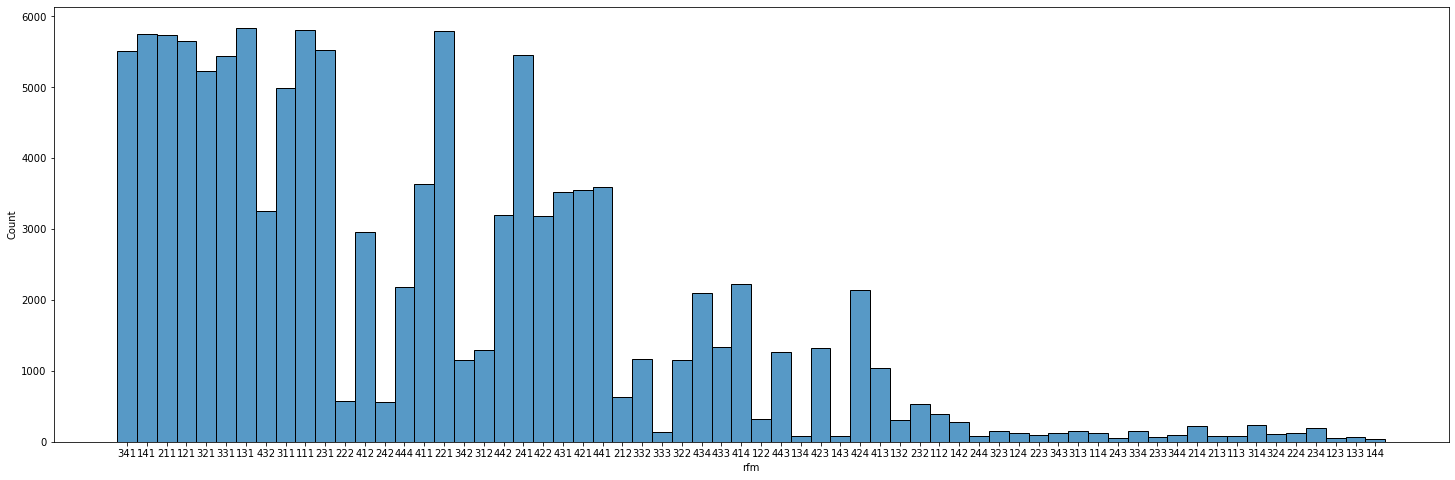

In [61]:
plt.figure(figsize=(25,8))
sns.histplot(rfm4.rfm)

In [62]:
df_trim=rfm4.copy()

In [63]:
df_trim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118315 entries, 0 to 118314
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_unique_id  118315 non-null  object 
 1   delay               115727 non-null  float64
 2   bought              118315 non-null  object 
 3   money               118315 non-null  float64
 4   days                118315 non-null  int64  
 5   times               118315 non-null  int64  
 6   monetary            118315 non-null  object 
 7   recency             118315 non-null  object 
 8   frequency           118315 non-null  object 
 9   summa               118315 non-null  int64  
 10  payment             118315 non-null  object 
 11  state               118315 non-null  object 
 12  ncategories         118315 non-null  int64  
 13  pcategory           116759 non-null  object 
 14  review_score        118315 non-null  float64
 15  rfm                 118315 non-nul

In [64]:
rfm4['summa']=rfm4['summa'].astype(float)
rfm4['recency']=rfm4['recency'].astype(float)
rfm4['frequency']=rfm4['frequency'].astype(float)
rfm4['monetary']=rfm4['monetary'].astype(float)

In [65]:
df_trim=rfm4.copy()

In [66]:
for i in range(12,2,-1):
    print(f"{i:02d} recency = {df_trim.loc[(df_trim.summa==i),'recency'].mean():.2f} frequency = {df_trim.loc[(df_trim.summa==i),'frequency'].mean():.2f} monetary = {df_trim.loc[(df_trim.summa==i),'monetary'].mean():.2f}")

12 recency = 4.00 frequency = 4.00 monetary = 4.00
11 recency = 3.39 frequency = 3.63 monetary = 3.97
10 recency = 3.18 frequency = 2.88 monetary = 3.94
09 recency = 2.91 frequency = 2.25 monetary = 3.83
08 recency = 3.01 frequency = 1.57 monetary = 3.42
07 recency = 2.71 frequency = 1.33 monetary = 2.97
06 recency = 2.54 frequency = 1.12 monetary = 2.33
05 recency = 2.01 frequency = 1.06 monetary = 1.93
04 recency = 1.48 frequency = 1.03 monetary = 1.49
03 recency = 1.00 frequency = 1.00 monetary = 1.00


In [67]:
df_trim

,customer_unique_id,delay,bought,money,days,times,monetary,recency,frequency,summa,payment,state,ncategories,pcategory,review_score,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,2018-05-10 10:56:27,141.90,115,1,3.0,4.0,1.0,8.0,credit_card,SP,1,bed_bath_table,5.0,341
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,2018-05-07 11:11:27,27.19,118,1,1.0,4.0,1.0,6.0,credit_card,SP,1,health_beauty,4.0,141
2,0000f46a3911fa3c0805444483337064,25.0,2017-03-10 21:05:03,86.22,541,1,2.0,1.0,1.0,4.0,credit_card,SC,1,stationery,3.0,211
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,2017-10-12 20:29:41,43.62,325,1,1.0,2.0,1.0,4.0,credit_card,PA,1,telephony,4.0,121
4,0004aac84e0df4da2b147fca70cf8255,13.0,2017-11-14 19:45:42,196.89,292,1,3.0,2.0,1.0,6.0,credit_card,SP,1,telephony,5.0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,fffcf5a5ff07b0908bd4e2dbc735a684,27.0,2017-06-08 21:00:36,4134.84,451,2,4.0,1.0,2.0,7.0,credit_card,PE,1,health_beauty,5.0,412
118311,fffea47cd6d3cc0a88bd621562a9d061,30.0,2017-12-10 20:07:56,84.58,266,1,2.0,2.0,1.0,5.0,credit_card,BA,1,baby,4.0,221
118312,ffff371b4d645b6ecea244b27531430a,14.0,2017-02-07 15:49:16,112.46,572,1,2.0,1.0,1.0,4.0,credit_card,MT,1,auto,5.0,211
118313,ffff5962728ec6157033ef9805bacc48,11.0,2018-05-02 15:17:41,133.69,123,1,3.0,3.0,1.0,7.0,credit_card,ES,1,watches_gifts,5.0,331


In [68]:
df_trim.loc[(df_trim.summa==10), 'rfm'].value_counts()

442    3204
424    2143
433    1335
334     148
343     126
244      87
Name: rfm, dtype: int64

In [69]:
df_trim

,customer_unique_id,delay,bought,money,days,times,monetary,recency,frequency,summa,payment,state,ncategories,pcategory,review_score,rfm
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,2018-05-10 10:56:27,141.90,115,1,3.0,4.0,1.0,8.0,credit_card,SP,1,bed_bath_table,5.0,341
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,2018-05-07 11:11:27,27.19,118,1,1.0,4.0,1.0,6.0,credit_card,SP,1,health_beauty,4.0,141
2,0000f46a3911fa3c0805444483337064,25.0,2017-03-10 21:05:03,86.22,541,1,2.0,1.0,1.0,4.0,credit_card,SC,1,stationery,3.0,211
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,2017-10-12 20:29:41,43.62,325,1,1.0,2.0,1.0,4.0,credit_card,PA,1,telephony,4.0,121
4,0004aac84e0df4da2b147fca70cf8255,13.0,2017-11-14 19:45:42,196.89,292,1,3.0,2.0,1.0,6.0,credit_card,SP,1,telephony,5.0,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,fffcf5a5ff07b0908bd4e2dbc735a684,27.0,2017-06-08 21:00:36,4134.84,451,2,4.0,1.0,2.0,7.0,credit_card,PE,1,health_beauty,5.0,412
118311,fffea47cd6d3cc0a88bd621562a9d061,30.0,2017-12-10 20:07:56,84.58,266,1,2.0,2.0,1.0,5.0,credit_card,BA,1,baby,4.0,221
118312,ffff371b4d645b6ecea244b27531430a,14.0,2017-02-07 15:49:16,112.46,572,1,2.0,1.0,1.0,4.0,credit_card,MT,1,auto,5.0,211
118313,ffff5962728ec6157033ef9805bacc48,11.0,2018-05-02 15:17:41,133.69,123,1,3.0,3.0,1.0,7.0,credit_card,ES,1,watches_gifts,5.0,331


In [70]:
#1.Rich and recent
filter_VIP = df_trim[df_trim.rfm.isin(['444','434','424','414','344','334','324','314'])].index
df_trim.loc[filter_VIP,'class_RFM'] = 'VIP'

In [132]:
#2.Rich and not recent
filter_VIP_forgotten = df_trim[df_trim.rfm.isin(['244','234','224','214','343','333','323','313'])].index
df_trim.loc[filter_VIP_forgotten,'class_RFM'] = 'VIP not recent'

In [72]:
#3.Lost VIP
filter_VIP_lost = df_trim[df_trim.rfm.isin(['144','134','124','114','143','133','123','113'])].index
df_trim.loc[filter_VIP_lost,'class_RFM'] = 'VIP lost'

In [73]:
#4.New not VIP
filter_new = (df_trim.recency.isin([4,3])) & (df_trim.class_RFM.isna())
filter_new = df_trim[filter_new].index
df_trim.loc[filter_new,'class_RFM'] = 'New'

In [74]:
#5.More than once not new or VIP
filter_fidel = (df_trim.frequency!=1) & (df_trim.class_RFM.isna())
filter_fidel = df_trim[filter_fidel].index
df_trim.loc[filter_fidel,'class_RFM'] = 'Fideles'

In [75]:
#6.Spenders
filter_spenders = (df_trim.monetary.isin([4,3])) & (df_trim.class_RFM.isna())
filter_spenders = df_trim[filter_spenders].index
df_trim.loc[filter_spenders,'class_RFM'] = 'Spenders'

In [76]:
#7.No money and long gone and only once
filter_lost = df_trim[df_trim.rfm.isin(['111', '112'])].index
df_trim.loc[filter_lost,'class_RFM'] = 'Lost'

In [77]:
#8.Clients autres
df_trim.class_RFM.fillna(value='Autres', inplace=True)

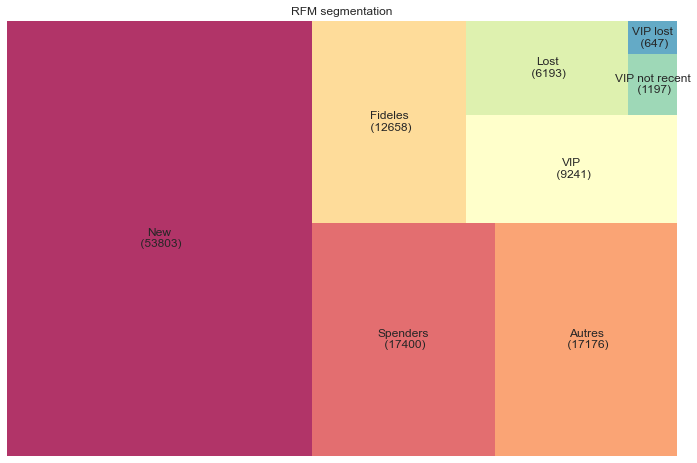

In [133]:
import squarify
note_pie = df_trim.class_RFM.value_counts()
labels = note_pie.index
labels = []
for i in range(0,len(note_pie)):
    labels.append(f"{note_pie.index[i]}\n ({note_pie[i]})")
    
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

plt.figure(figsize=(12, 8))
squarify.plot(sizes=note_pie, label=labels, alpha=.8, color=colors)
plt.axis('off')
plt.title('RFM segmentation')
plt.savefig('P2_02_Treemap_RFM.jpg')
plt.show()

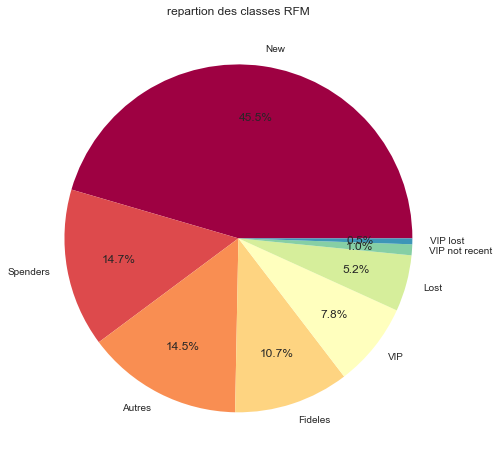

In [134]:
note_pie = df_trim.class_RFM.value_counts()

plt.figure(figsize=(12, 8))
plt.pie(note_pie, labels= note_pie.index, autopct='%1.1f%%', pctdistance=0.7, colors=colors)
plt.title('repartion des classes RFM')
plt.savefig('P2_01_pie_RFM.jpg')
plt.show() 

In [80]:
df_trim.groupby(by  = 'class_RFM').mean()

,delay,money,days,times,monetary,recency,frequency,summa,ncategories,review_score
class_RFM,,,,,,,,,,
Autres,12.462675,72.001869,338.596996,1.000000,1.670878,1.666279,1.000000,4.337156,0.984630,4.144446
Fideles,12.352823,435.100687,364.527492,2.200032,3.512877,1.525438,2.200032,7.238347,1.118344,3.784958
Lost,10.558375,43.874137,459.567576,1.062328,1.000000,1.000000,1.062328,3.062328,0.971904,4.205716
New,11.470652,221.333828,116.429493,1.295262,2.621564,3.498578,1.295262,7.415404,1.034831,4.050889
Spenders,13.803152,265.049373,370.053276,1.000000,3.412931,1.504540,1.000000,5.917471,0.980690,4.116207
VIP,11.737408,2355.009974,250.035061,7.309490,3.936046,2.469754,4.000000,10.405800,1.289904,3.539877
VIP forgotten,11.239557,121.909532,270.687552,5.068505,2.478697,2.319967,3.521303,8.319967,1.172932,4.033417
VIP lost,11.804724,45.841267,275.605873,5.797527,1.000000,2.284389,3.564142,6.848532,0.993818,4.217929


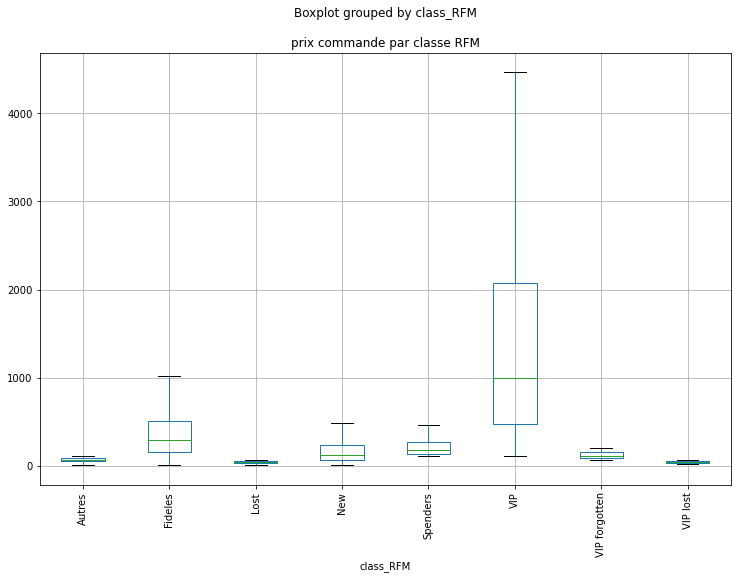

In [81]:
df_trim.boxplot('money', by='class_RFM',  figsize=(12, 8), showfliers=False)
plt.xticks(rotation=90)
plt.title('prix commande par classe RFM')
plt.savefig('P2_03_price_RFM.jpg')
plt.show()

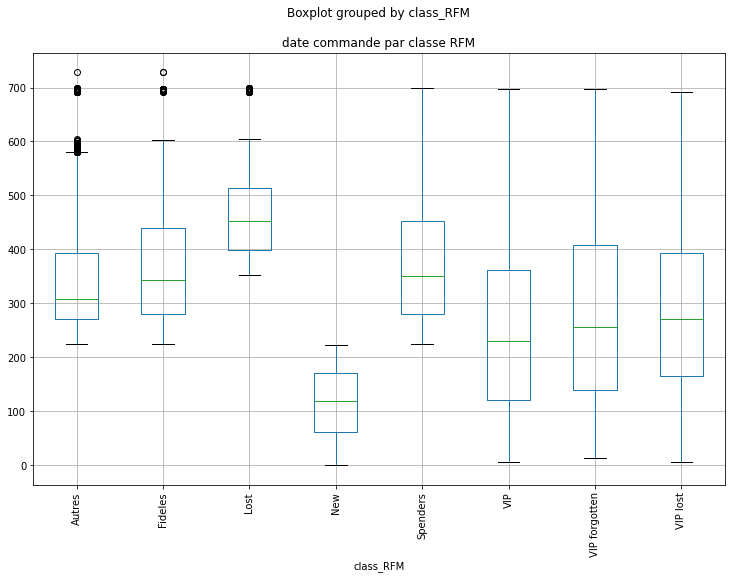

In [82]:
df_trim.boxplot('days', by='class_RFM',  figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('date commande par classe RFM')
plt.savefig('P2_04_date_RFM.jpg')
plt.show()

In [83]:
arr2 = df_trim[df_trim["times"] < 40]

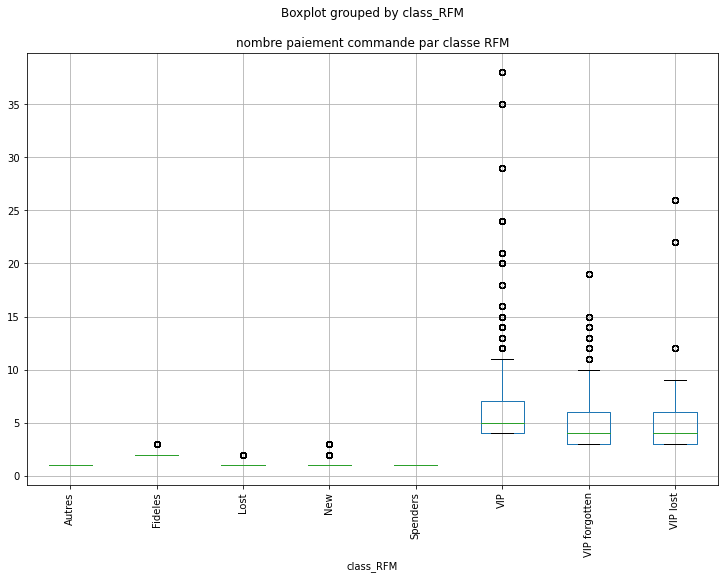

In [84]:
arr2.boxplot('times', by='class_RFM',  figsize=(12, 8))
plt.xticks(rotation=90)
plt.title('nombre paiement commande par classe RFM')
plt.savefig('P2_05_nb_paiement_RFM.jpg')
plt.show()

## Kmeans

In [85]:
test=segmentation.copy()

In [86]:
test

,customer_unique_id,delay,bought,money,days,times,monetary,recency,frequency,summa,payment,state,ncategories,pcategory,review_score
0,0000366f3b9a7992bf8c76cfdf3221e2,6.0,2018-05-10 10:56:27,141.90,115,1,3,4,1,8,credit_card,SP,1,bed_bath_table,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,3.0,2018-05-07 11:11:27,27.19,118,1,1,4,1,6,credit_card,SP,1,health_beauty,4.0
2,0000f46a3911fa3c0805444483337064,25.0,2017-03-10 21:05:03,86.22,541,1,2,1,1,4,credit_card,SC,1,stationery,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,2017-10-12 20:29:41,43.62,325,1,1,2,1,4,credit_card,PA,1,telephony,4.0
4,0004aac84e0df4da2b147fca70cf8255,13.0,2017-11-14 19:45:42,196.89,292,1,3,2,1,6,credit_card,SP,1,telephony,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118310,fffcf5a5ff07b0908bd4e2dbc735a684,27.0,2017-06-08 21:00:36,4134.84,451,2,4,1,2,7,credit_card,PE,1,health_beauty,5.0
118311,fffea47cd6d3cc0a88bd621562a9d061,30.0,2017-12-10 20:07:56,84.58,266,1,2,2,1,5,credit_card,BA,1,baby,4.0
118312,ffff371b4d645b6ecea244b27531430a,14.0,2017-02-07 15:49:16,112.46,572,1,2,1,1,4,credit_card,MT,1,auto,5.0
118313,ffff5962728ec6157033ef9805bacc48,11.0,2018-05-02 15:17:41,133.69,123,1,3,3,1,7,credit_card,ES,1,watches_gifts,5.0


In [88]:
finish = pd.to_datetime('2018-03-03')
start = pd.to_datetime('2016-09-04')
test['bought']=pd.to_datetime(test['bought'])
firstsec = (test.bought>start) &  (test.bought<finish) 
test2 = test[firstsec].copy()

In [89]:
test2

,customer_unique_id,delay,bought,money,days,times,monetary,recency,frequency,summa,payment,state,ncategories,pcategory,review_score
2,0000f46a3911fa3c0805444483337064,25.0,2017-03-10 21:05:03,86.22,541,1,2,1,1,4,credit_card,SC,1,stationery,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,20.0,2017-10-12 20:29:41,43.62,325,1,1,2,1,4,credit_card,PA,1,telephony,4.0
4,0004aac84e0df4da2b147fca70cf8255,13.0,2017-11-14 19:45:42,196.89,292,1,3,2,1,6,credit_card,SP,1,telephony,5.0
7,00053a61a98854899e70ed204dd4bafe,16.0,2018-02-28 11:15:41,838.36,186,2,4,3,2,9,credit_card,PR,1,sports_leisure,1.0
8,00053a61a98854899e70ed204dd4bafe,16.0,2018-02-28 11:15:41,838.36,186,2,4,3,2,9,credit_card,PR,1,sports_leisure,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118309,fffcf5a5ff07b0908bd4e2dbc735a684,27.0,2017-06-08 21:00:36,4134.84,451,2,4,1,2,7,credit_card,PE,1,health_beauty,5.0
118310,fffcf5a5ff07b0908bd4e2dbc735a684,27.0,2017-06-08 21:00:36,4134.84,451,2,4,1,2,7,credit_card,PE,1,health_beauty,5.0
118311,fffea47cd6d3cc0a88bd621562a9d061,30.0,2017-12-10 20:07:56,84.58,266,1,2,2,1,5,credit_card,BA,1,baby,4.0
118312,ffff371b4d645b6ecea244b27531430a,14.0,2017-02-07 15:49:16,112.46,572,1,2,1,1,4,credit_card,MT,1,auto,5.0


In [90]:
test3=test2[['review_score','monetary','recency','frequency','ncategories','delay']]

In [91]:
test3.drop(test3[test3['delay'].isna()].index, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [92]:
test3=test3.astype(float)

In [93]:
test3.describe()

,review_score,monetary,recency,frequency,ncategories,delay
count,69847.000000,69847.000000,69847.000000,69847.000000,69847.000000,69847.000000
mean,4.032595,2.702478,1.772961,1.568757,1.047432,13.136083
std,1.359544,1.149856,0.747526,0.954927,0.316075,10.046191
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3.666667,2.000000,1.000000,1.000000,1.000000,7.000000
50%,5.000000,3.000000,2.000000,1.000000,1.000000,11.000000
75%,5.000000,4.000000,2.000000,2.000000,1.000000,16.000000
max,5.000000,4.000000,4.000000,4.000000,5.000000,209.000000


In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
test4 = MinMaxScaler().fit_transform(test3)

In [96]:
test4

array([[0.5       , 0.33333333, 0.        , 0.        , 0.2       ,
        0.11961722],
       [0.75      , 0.        , 0.33333333, 0.        , 0.2       ,
        0.09569378],
       [1.        , 0.66666667, 0.33333333, 0.        , 0.2       ,
        0.06220096],
       ...,
       [0.75      , 0.33333333, 0.33333333, 0.        , 0.2       ,
        0.14354067],
       [1.        , 0.33333333, 0.        , 0.        , 0.2       ,
        0.06698565],
       [1.        , 0.33333333, 0.        , 0.        , 0.2       ,
        0.03349282]])

In [97]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score,silhouette_score,silhouette_samples

In [156]:
sse,db,slc = {}, {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=1000,random_state=10).fit(test4)
    if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    db[k] = davies_bouldin_score(test4,clusters)
    slc[k] = silhouette_score(test4,clusters)

In [137]:
sse,db,slc = {}, {}, {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init = 'k-means++', max_iter=1000,random_state=10).fit(test4)
    if k == 4: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ 
    db[k] = davies_bouldin_score(test4,clusters)
    slc[k] = silhouette_score(test4,clusters)

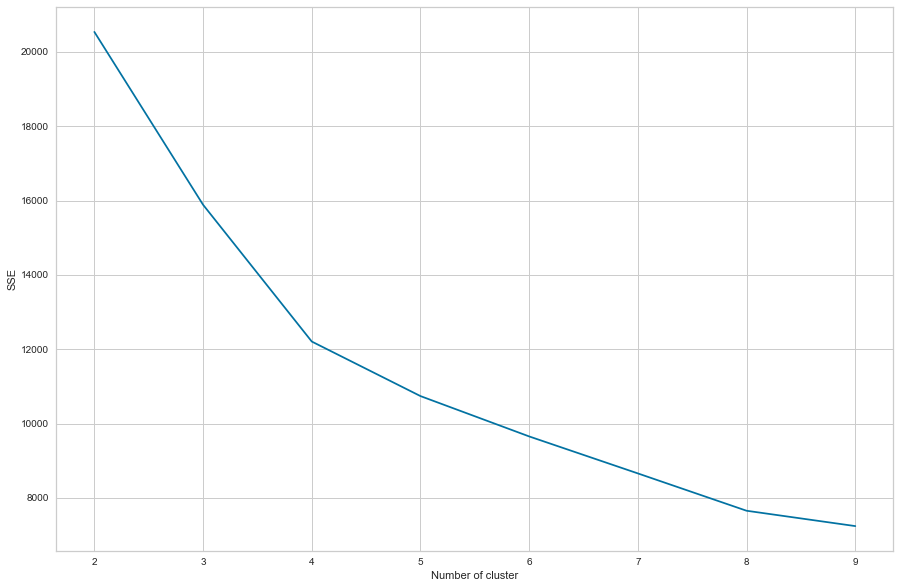

In [157]:
plt.figure(figsize=(15,10))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

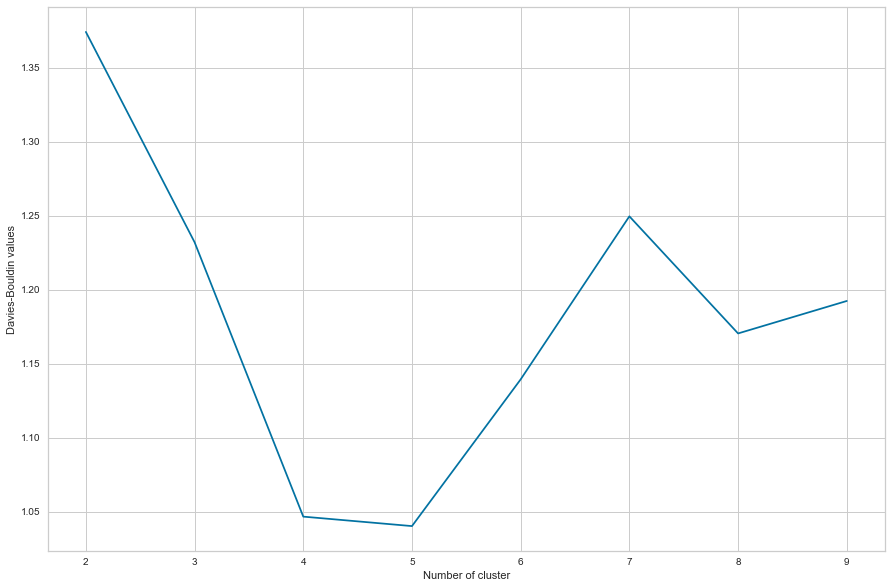

In [158]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

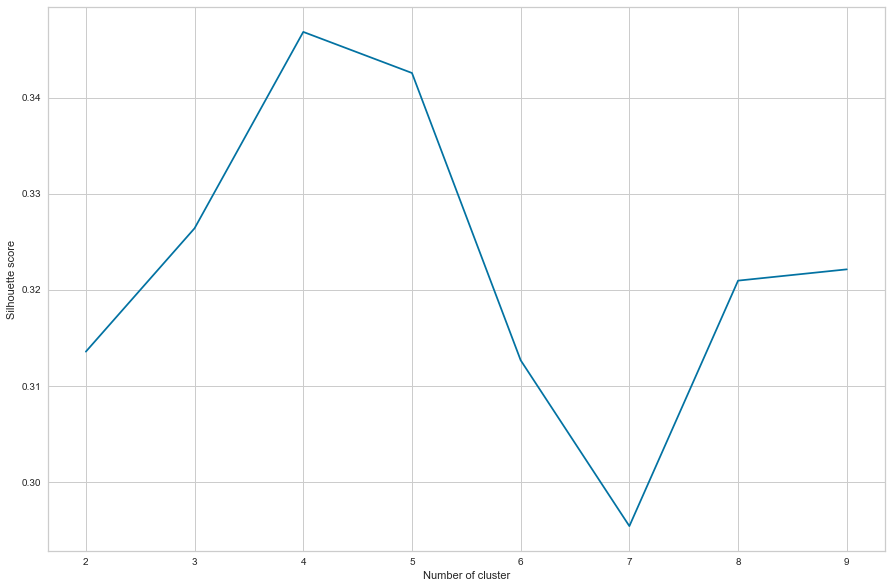

In [159]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

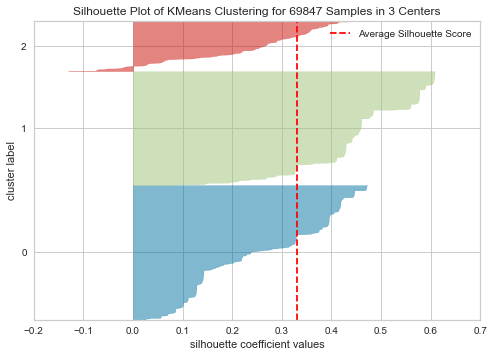

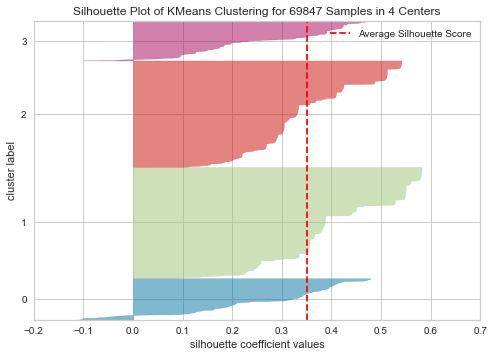

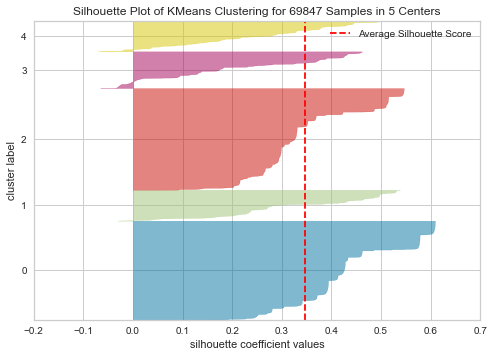

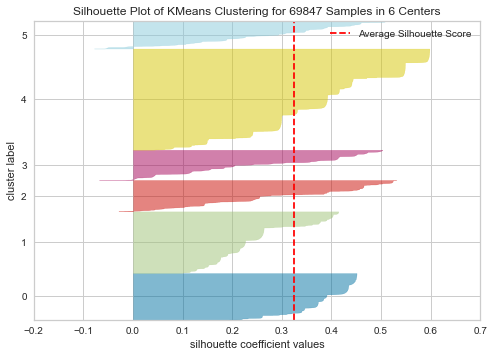

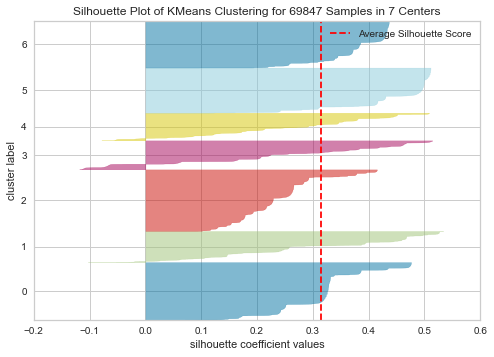

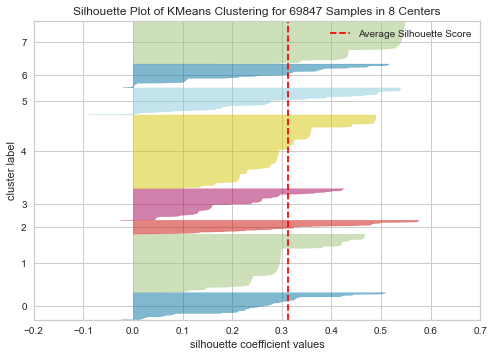

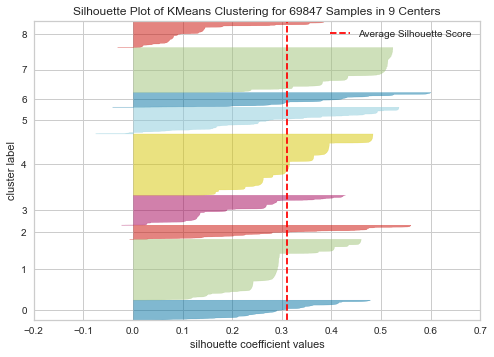

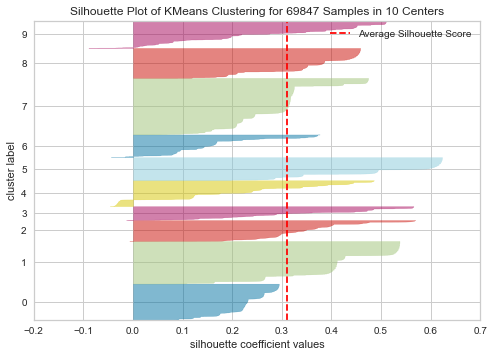

In [113]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(3, 11):
    model = KMeans(i, random_state=1944, init = 'k-means++', max_iter=1000,random_state=10)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(test4)        # Fit the data to the visualizer
    savef = 'P2_07_silhouette_score_KMEANS_nbcluster-'+str(i)+'.jpg'
    plt.savefig(savef)
    visualizer.show()   

In [160]:
test5=test4.copy()

In [161]:
test5.shape[0]

69847

In [162]:
data_X_tsd = pd.DataFrame(test5,columns=test3.columns.tolist())
data_X_tsd.describe()

,review_score,monetary,recency,frequency,ncategories,delay
count,69847.000000,69847.000000,69847.000000,69847.000000,69847.000000,69847.000000
mean,0.758149,0.567493,0.257654,0.189586,0.209486,0.062852
std,0.339886,0.383285,0.249175,0.318309,0.063215,0.048068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.333333,0.000000,0.000000,0.200000,0.033493
50%,1.000000,0.666667,0.333333,0.000000,0.200000,0.052632
75%,1.000000,1.000000,0.333333,0.333333,0.200000,0.076555
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [163]:
data_X_tsd

,review_score,monetary,recency,frequency,ncategories,delay
0,0.50,0.333333,0.000000,0.000000,0.2,0.119617
1,0.75,0.000000,0.333333,0.000000,0.2,0.095694
2,1.00,0.666667,0.333333,0.000000,0.2,0.062201
3,0.00,1.000000,0.666667,0.333333,0.2,0.076555
4,0.00,1.000000,0.666667,0.333333,0.2,0.076555
...,...,...,...,...,...,...
69842,1.00,1.000000,0.000000,0.333333,0.2,0.129187
69843,1.00,1.000000,0.000000,0.333333,0.2,0.129187
69844,0.75,0.333333,0.333333,0.000000,0.2,0.143541
69845,1.00,0.333333,0.000000,0.000000,0.2,0.066986


In [164]:
kiviat = pd.DataFrame(columns=data_X_tsd.columns)

for i in range(0,4):
    affic = data_X_tsd[(kmeans.labels_==i)]
    for column in kiviat:
        kiviat.loc[i,column]=affic[column].mean()
    print('cluster',i,'contenant',affic.shape[0])
    print(affic.mean())

cluster 0 contenant 13677
review_score    0.918047
monetary        0.166484
recency         0.432161
frequency       0.027613
ncategories     0.199093
delay           0.056154
dtype: float64
cluster 1 contenant 10914
review_score    0.894436
monetary        0.835257
recency         0.000000
frequency       0.105553
ncategories     0.203408
delay           0.055535
dtype: float64
cluster 2 contenant 2981
review_score    0.121916
monetary        0.961758
recency         0.316449
frequency       0.885944
ncategories     0.234552
delay           0.072223
dtype: float64
cluster 3 contenant 4507
review_score    0.174081
monetary        0.174469
recency         0.297167
frequency       0.037053
ncategories     0.197382
delay           0.092766
dtype: float64


In [165]:
data_X_tsd[(kmeans.labels_== 1)].shape[0]

10914

In [166]:
data_X_tsd.shape[0]

69847

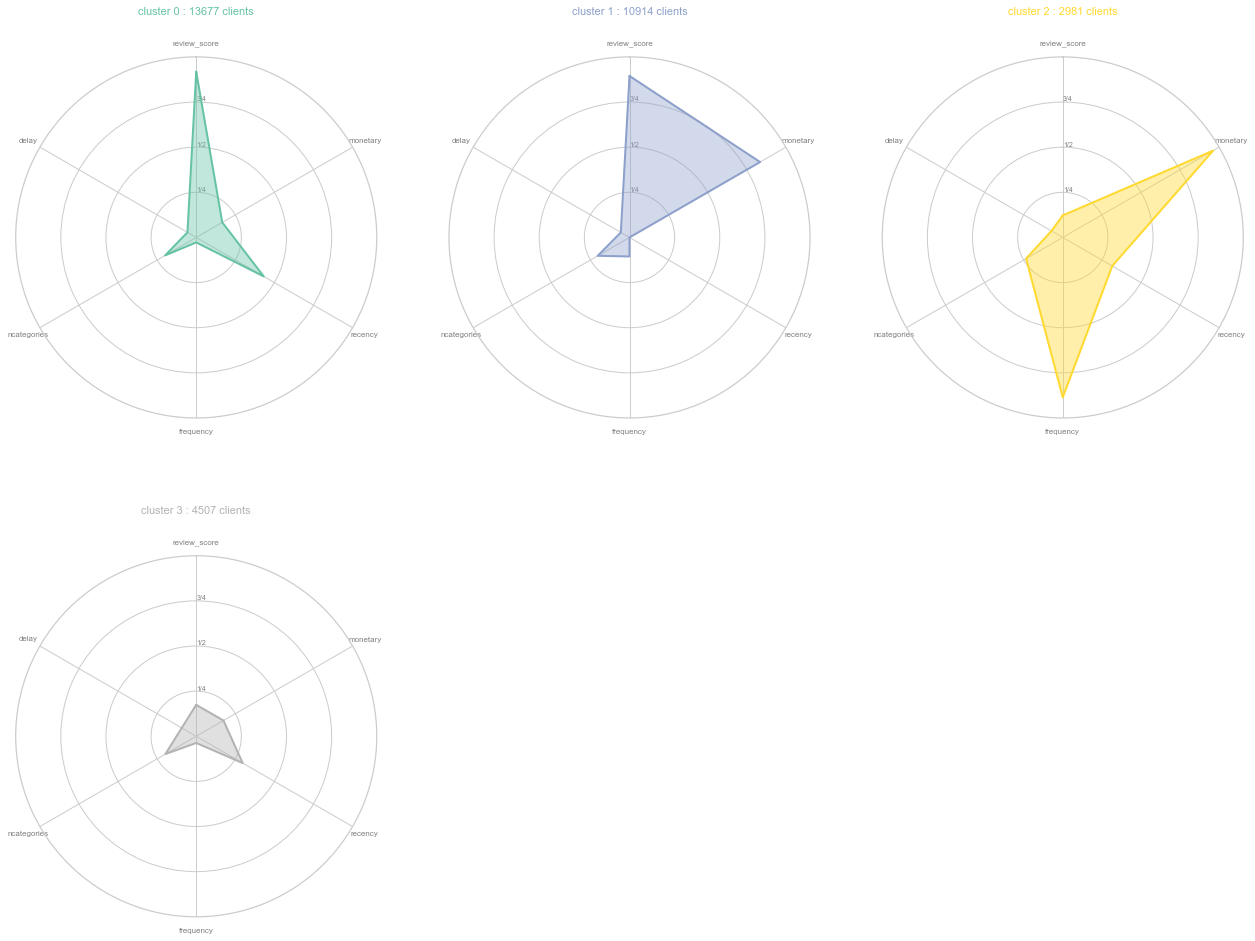

In [167]:
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):

    # number of variable
    categories=list(kiviat)
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(3,3,row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["1/4","1/2","3/4"], color="grey", size=7)
    plt.ylim(0,1)

    # Ind1
    values=kiviat.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    title += ' : '+str(data_X_tsd[(kmeans.labels_== row)].shape[0]) + ' clients'
    plt.title(title, size=11, color=color, y=1.1)
    
# ------- PART 2: Apply the function to all individuals
# initialize the figure
plt.figure(figsize=(22, 26))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(kiviat.index))
 
# Loop to plot
for row in range(0, len(kiviat.index)):
    make_spider( row=row, title='cluster '+str(row), color=my_palette(row))
    
plt.savefig('P2_17_kiviat.jpg')


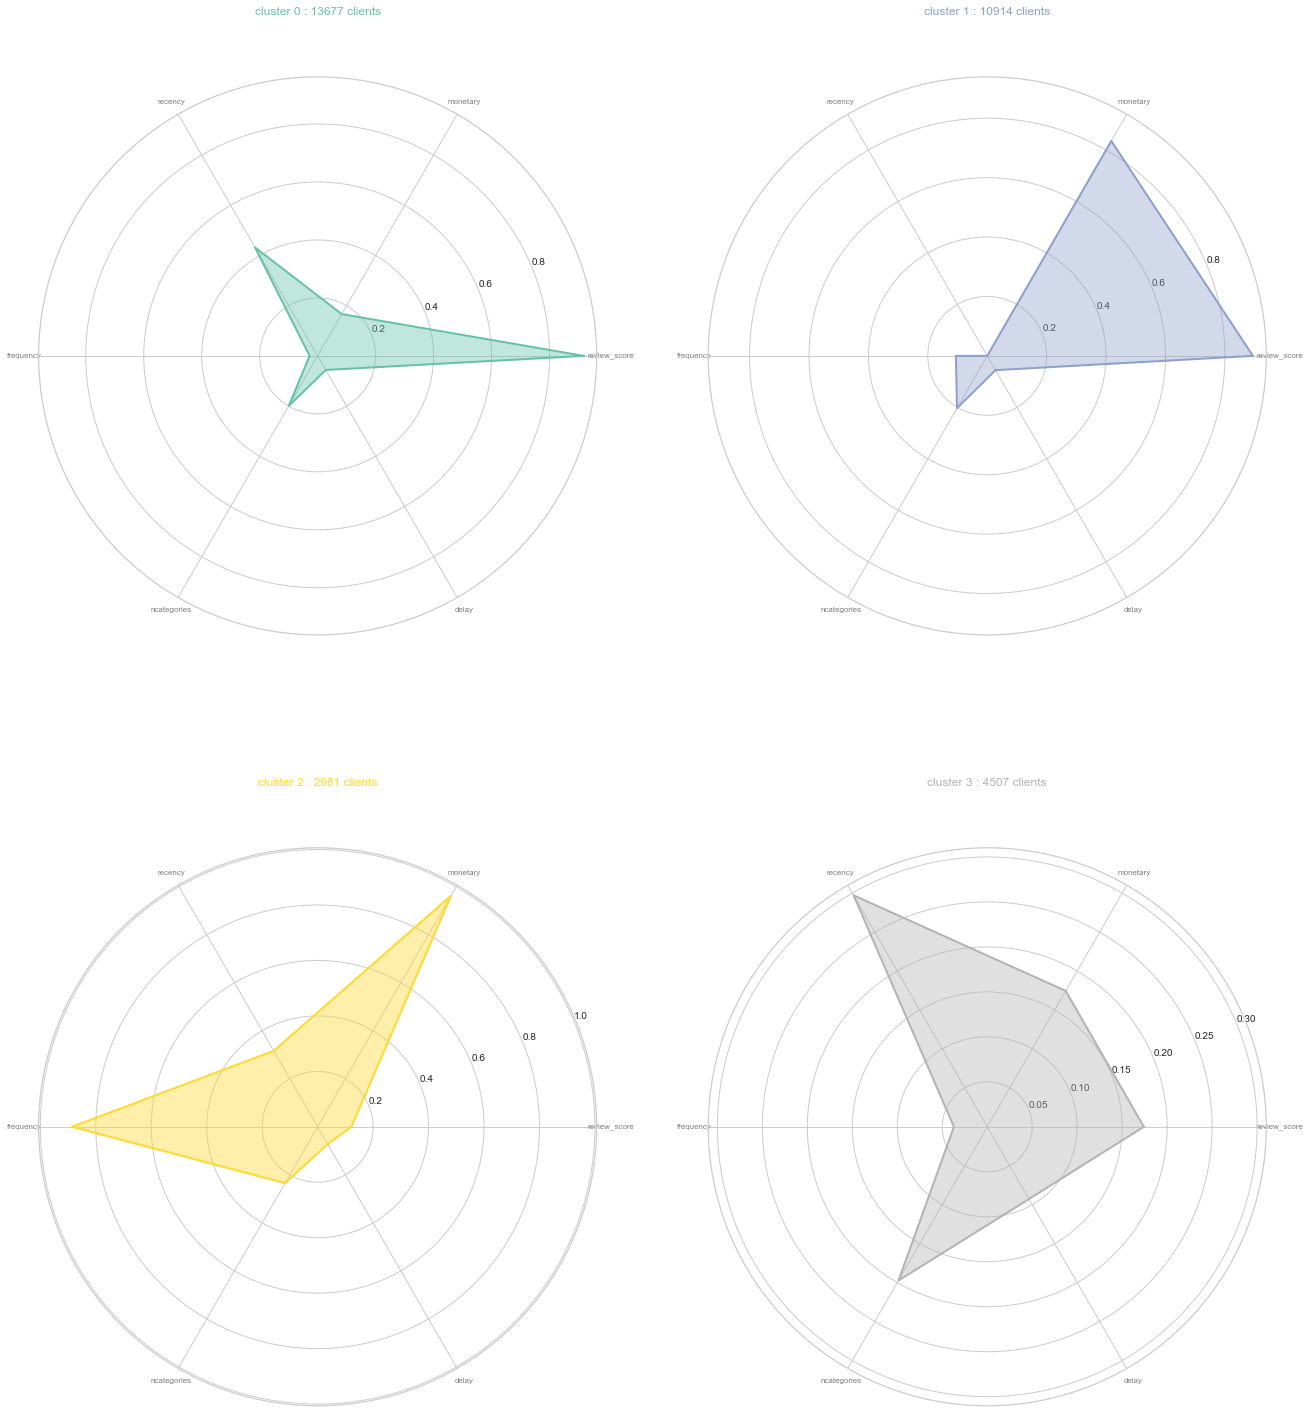

In [168]:
def make_spider(row, title, color):

    # number of variable
    categories=list(kiviat)
    N = len(categories)

    # divide the plot/number of variable
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(2,2,row+1, polar=True, )

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Ind1
    values=kiviat.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    title += ' : '+str(data_X_tsd[(kmeans.labels_== row)].shape[0]) + ' clients'
    plt.title(title, size=12, color=color, y=1.1)
    
# Apply the function to all individuals
plt.figure(figsize=(22, 26))
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(kiviat.index))
 
# Loop to plot
for row in range(0, len(kiviat.index)):
    make_spider( row=row, title='cluster '+str(row), color=my_palette(row))
    
plt.savefig('P2_17_kiviat.jpg')